# Plot CardiotFit ECG

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [79]:
# Read the ECG data from a text file
path = r"C:\Users\USER\Documents\SLIIT\Datasets\CardioFit AI Dataset\ECG txt files\Sathira 2\411_2024_04_28_14_24_2.txt"

with open(path, 'r') as file:
    ecg_data = file.read()
    
# Remove leading comma and split the values into a list
ecg_values = ecg_data.strip().split(",")[1:]  # Skip the first empty element

# Convert the string values to float
ecg_values = [float(value) for value in ecg_values if value.strip()]

In [4]:
# Create a time axis based on the number of samples
sampling_rate = 256
time_axis = np.arange(len(ecg_values)) / sampling_rate

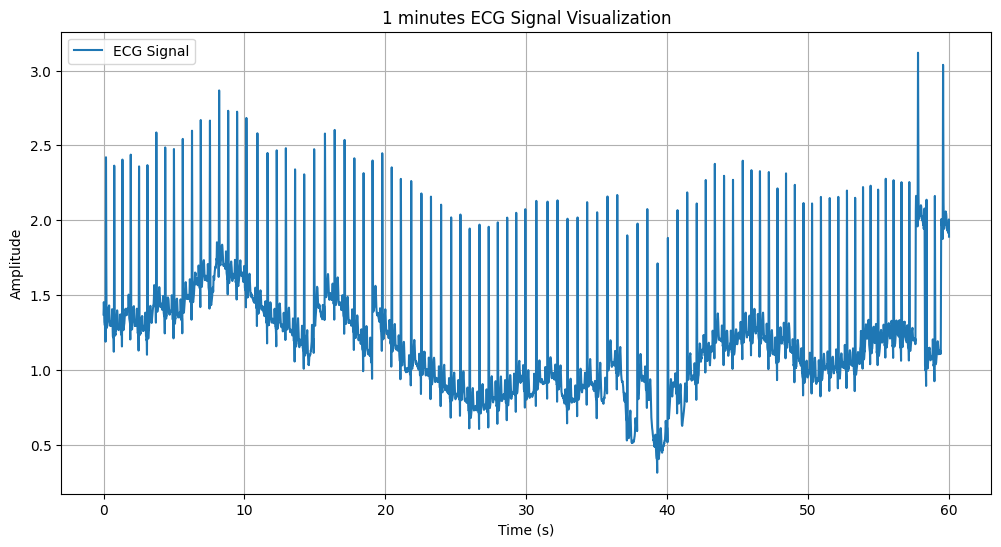

In [5]:
# Plot the ECG values
plt.figure(figsize=(12, 6))
plt.plot(time_axis, ecg_values, label='ECG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('1 minutes ECG Signal Visualization')
plt.legend()
plt.grid(True)
plt.show()

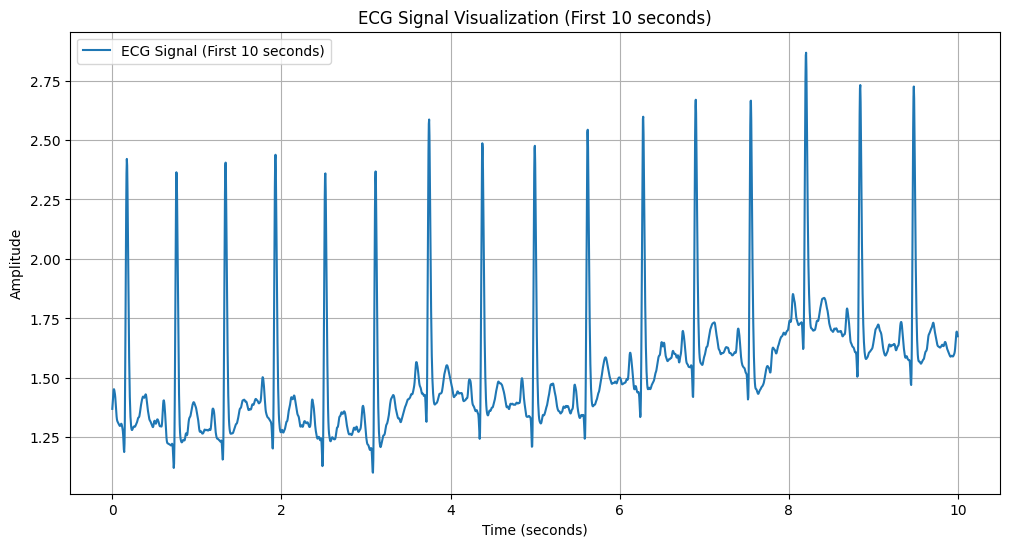

In [7]:
# Calculate the number of samples in 10 seconds
samples_per_interval = sampling_rate * 10

# Select the first 10 seconds of data
ecg_values_10s = ecg_values[:samples_per_interval]

# Create a time axis for the first 10 seconds
time_axis_10s = np.arange(len(ecg_values_10s)) / sampling_rate

# Plot the first 10 seconds of ECG data
plt.figure(figsize=(12, 6))
plt.plot(time_axis_10s, ecg_values_10s, label='ECG Signal (First 10 seconds)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('ECG Signal Visualization (First 10 seconds)')
plt.legend()
plt.grid(True)
plt.show()

# Function to plot any duration

In [8]:
# Function to plot a specific interval of ECG data
def plot_ecg_interval(start_time, duration, ecg_values, sampling_rate):
    start_sample = int(start_time * sampling_rate)
    end_sample = int((start_time + duration) * sampling_rate)
    ecg_values_interval = ecg_values[start_sample:end_sample]
    time_axis_interval = np.arange(len(ecg_values_interval)) / sampling_rate
    
    plt.figure(figsize=(12, 6))
    plt.plot(time_axis_interval, ecg_values_interval, label=f'ECG Signal ({start_time} to {start_time + duration} seconds)')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.title(f'ECG Signal Visualization ({start_time} to {start_time + duration} seconds)')
    plt.legend()
    plt.grid(True)
    plt.show()


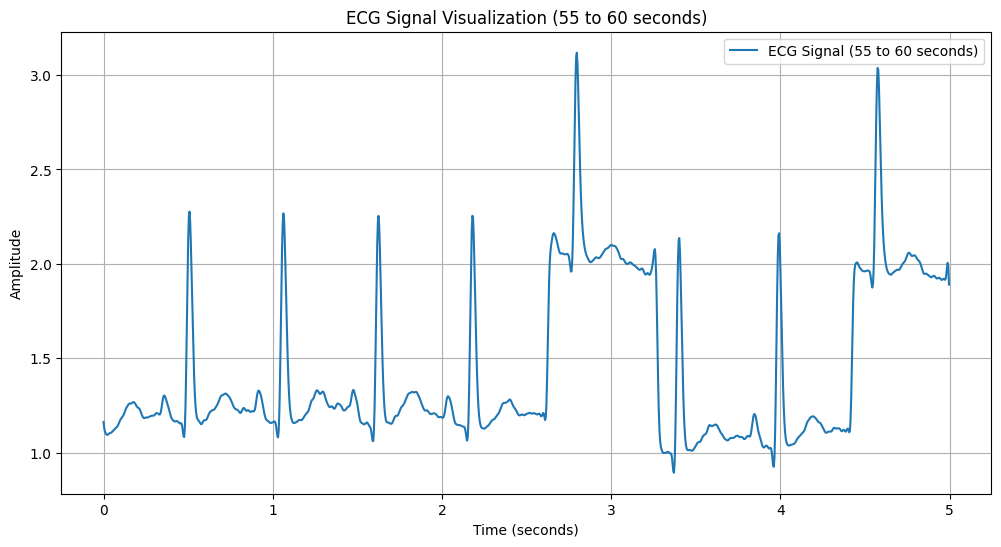

In [26]:
# Plot any duration
plot_ecg_interval(start_time = 55, duration = 5, ecg_values = ecg_values, sampling_rate = sampling_rate)

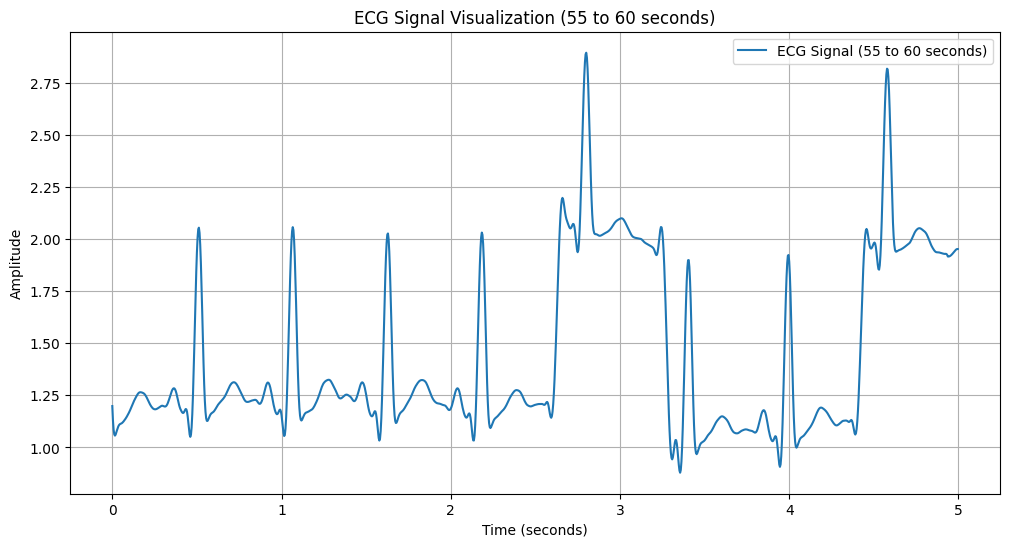

In [37]:
# Plot any duration
smoothed_signal = savgol_filter(ecg_values, window_length=31, polyorder=4)
plot_ecg_interval(start_time = 55, duration = 5, ecg_values = smoothed_signal, sampling_rate = sampling_rate)

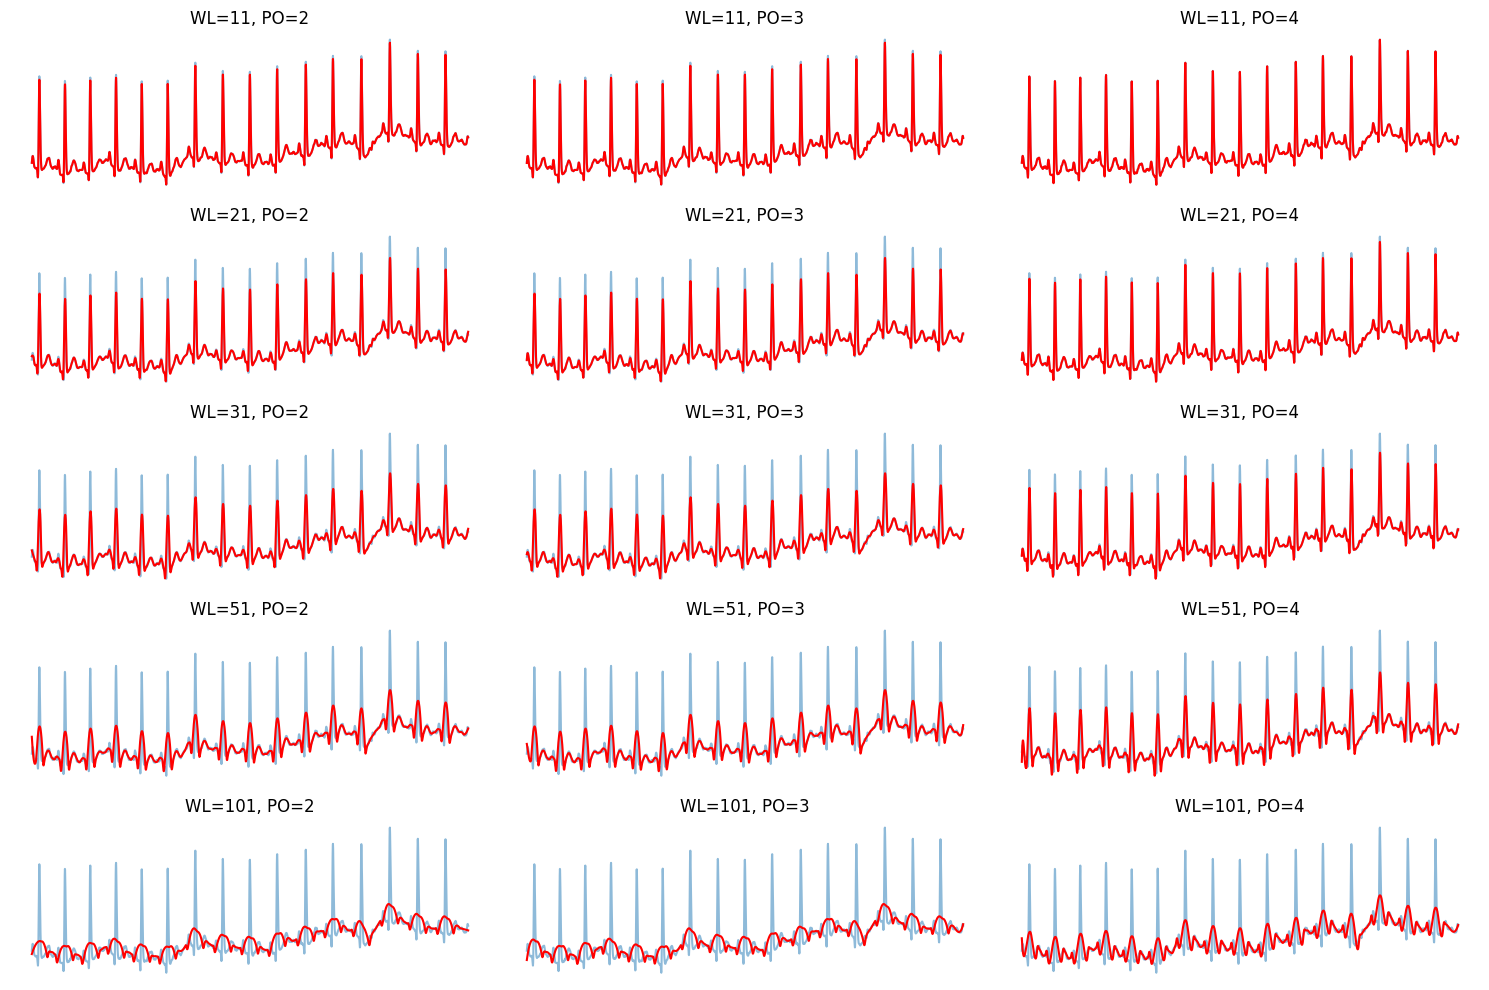

In [21]:
# Define possible window lengths and polynomial orders
window_lengths = [11, 21, 31, 51, 101]
polyorders = [2, 3, 4]

# Calculate the number of samples in 10 seconds
samples_per_interval = sampling_rate * 10

# Select the first 10 seconds of data
ecg_values_10s = ecg_values[:samples_per_interval]

# Create a time axis for the first 10 seconds
time_axis_10s = np.arange(len(ecg_values_10s)) / sampling_rate

# Plot the results for different parameter combinations
plt.figure(figsize=(15, 10))
for i, window_length in enumerate(window_lengths):
    for j, polyorder in enumerate(polyorders):
        if polyorder < window_length:  # polyorder must be less than window_length
            smoothed_signal_10s = savgol_filter(ecg_values_10s, window_length=window_length, polyorder=polyorder)
            plt.subplot(len(window_lengths), len(polyorders), i * len(polyorders) + j + 1)
            plt.plot(time_axis_10s, ecg_values_10s, alpha=0.5)
            plt.plot(time_axis_10s, smoothed_signal_10s, color='red')
            plt.title(f'WL={window_length}, PO={polyorder}')
            plt.axis('off')
plt.tight_layout()
plt.show()

# Calculating Heart rate of entire 1 minute ECG

In [10]:
import pandas as pd
from scipy.signal import find_peaks, savgol_filter

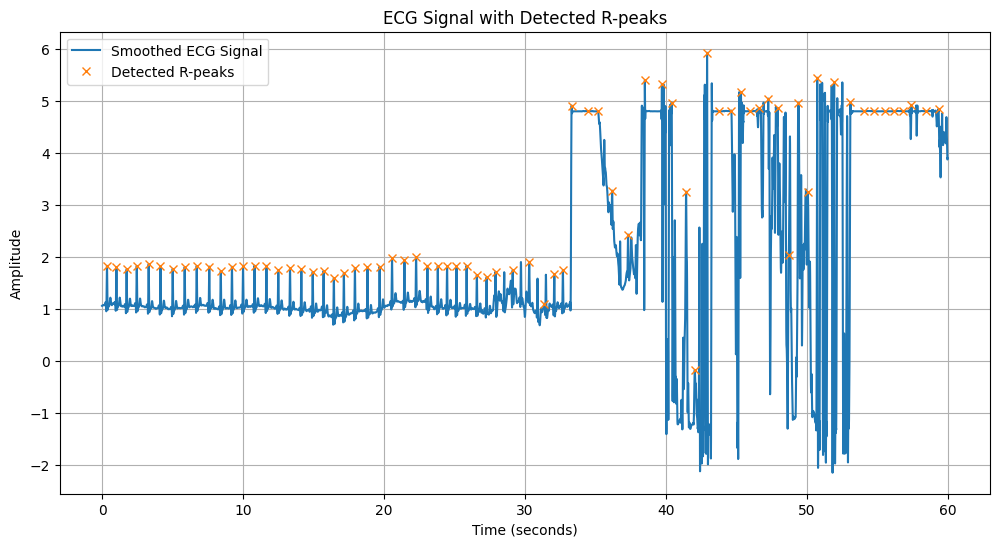

Average Heart Rate: 75.89 bpm


In [80]:
# Convert the list to a NumPy array for convenience
ecg_values = np.array(ecg_values)

# Smooth the ECG signal to help with peak detection
smoothed_signal = savgol_filter(ecg_values, window_length=31, polyorder=4)

# Detect R-peaks in the smoothed ECG signal
peaks, _ = find_peaks(smoothed_signal, distance=sampling_rate * 0.6)  # Adjust the distance parameter based on expected heart rate

# Calculate the time differences between successive peaks (RR intervals)
peak_times = time_axis[peaks]
rr_intervals = np.diff(peak_times)

# Calculate heart rate (in beats per minute)
heart_rate = 60.0 / rr_intervals
average_heart_rate = np.mean(heart_rate)

# Plot the ECG signal and detected peaks
plt.figure(figsize=(12, 6))
plt.plot(time_axis, smoothed_signal, label='Smoothed ECG Signal')
plt.plot(peak_times, smoothed_signal[peaks], "x", label='Detected R-peaks')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('ECG Signal with Detected R-peaks')
plt.legend()
plt.grid(True)
plt.show()

# Display the calculated heart rate
print(f'Average Heart Rate: {average_heart_rate:.2f} bpm')

# Calculate heart rate from 10 second ECG

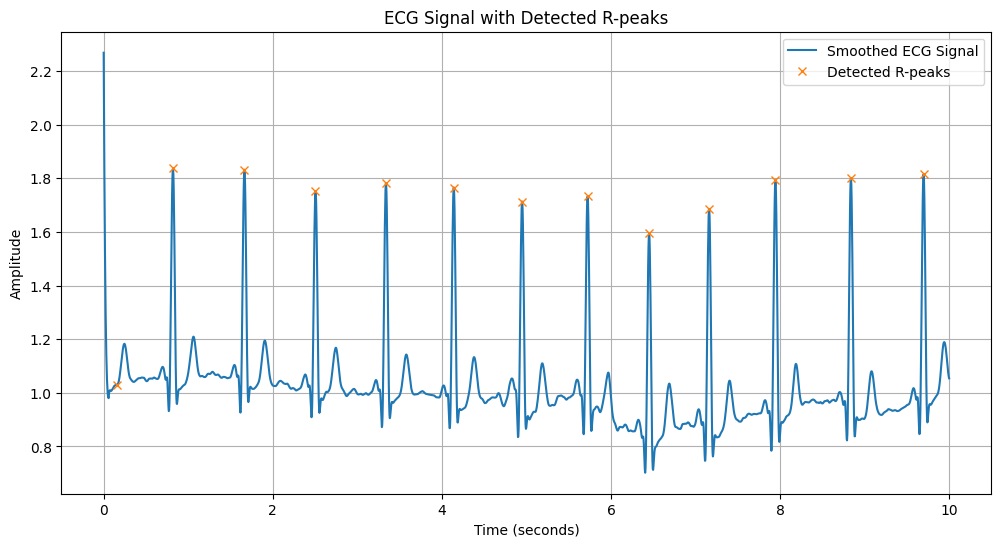

Average Heart Rate: 75.96 bpm


In [81]:
# Function to plot a specific interval of ECG data
def calcHeartRate(start_time, duration, ecg_values, sampling_rate):
    start_sample = int(start_time * sampling_rate)
    end_sample = int((start_time + duration) * sampling_rate)
    ecg_values_interval = ecg_values[start_sample:end_sample]
    
    # Smooth the ECG signal to help with peak detection
    smoothed_signal = savgol_filter(ecg_values_interval, window_length=31, polyorder=4)
    
    # Enhance the signal by squaring it (optional)
    enhanced_signal = np.square(smoothed_signal)
    
    # Detect R-peaks in the smoothed ECG signal
    peaks, _ = find_peaks(smoothed_signal,
                          distance=sampling_rate * 0.6, # Adjust the distance parameter based on expected heart rate
                          height=np.std(enhanced_signal) * 1.5)  # Adjust height to filter out small peaks
    
    time_axis_interval = np.arange(len(ecg_values_interval)) / sampling_rate
    
    # Calculate the time differences between successive peaks (RR intervals)
    peak_times = time_axis_interval[peaks]
    rr_intervals = np.diff(peak_times)
    
    # Calculate heart rate (in beats per minute)
    heart_rate = 60.0 / rr_intervals
    average_heart_rate = np.mean(heart_rate)
    
    # Plot the ECG signal and detected peaks
    plt.figure(figsize=(12, 6))
    plt.plot(time_axis_interval, smoothed_signal, label='Smoothed ECG Signal')
    plt.plot(peak_times, smoothed_signal[peaks], "x", label='Detected R-peaks')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.title('ECG Signal with Detected R-peaks')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Display the calculated heart rate
    print(f'Average Heart Rate: {average_heart_rate:.2f} bpm')
    
calcHeartRate(start_time = 10, duration = 10, ecg_values = ecg_values, sampling_rate = sampling_rate)


In [ ]:
# # Convert the list to a NumPy array for convenience
# # ecg_values = np.array(ecg_values)
# 
# # Smooth the ECG signal to help with peak detection
# # smoothed_signal = savgol_filter(ecg_values, window_length=51, polyorder=3)
# 
# # Detect R-peaks in the smoothed ECG signal
# # peaks, _ = find_peaks(smoothed_signal, distance=sampling_rate * 0.6)  # Adjust the distance parameter based on expected heart rate
# 
# # Calculate the time differences between successive peaks (RR intervals)
# # peak_times = time_axis[peaks]
# # rr_intervals = np.diff(peak_times)
# 
# # Calculate heart rate (in beats per minute)
# heart_rate = 60.0 / rr_intervals
# average_heart_rate = np.mean(heart_rate)
# 
# # Plot the ECG signal and detected peaks
# plt.figure(figsize=(12, 6))
# plt.plot(time_axis, smoothed_signal, label='Smoothed ECG Signal')
# plt.plot(peak_times, smoothed_signal[peaks], "x", label='Detected R-peaks')
# plt.xlabel('Time (seconds)')
# plt.ylabel('Amplitude')
# plt.title('ECG Signal with Detected R-peaks')
# plt.legend()
# plt.grid(True)
# plt.show()
# 
# # Display the calculated heart rate
# print(f'Average Heart Rate: {average_heart_rate:.2f} bpm')